<h1 align="center">EDA & ETL DataSmart<h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando o dataset

In [2]:
df = pd.read_csv("vendas_online_com_erros.csv", decimal=".")
df["Data_Venda"] = pd.to_datetime(df["Data_Venda"])
df.head()

,ID_Pedido,Data_Venda,Nome_Produto,Categoria,Quantidade,Preco_Unitario,Valor_Total,Nome_Cliente,Estado,Email,Metodo_Pagamento
0,01a193ef-60a9-4aa6-8d51-50c61589cc0a,2022-08-10,Camiseta Básica,Roupas,1,1202.56,1202.56,Patrícia Ferreira,PA,patrícia.ferreira@teste.br,PIX
1,4ae8427f-14ed-4bff-9bbf-5e6f53e9085e,2024-09-13,Bicicleta Mountain Bike,Esportes e Lazer,2,2606.71,5213.42,Bruno Santos,AM,bruno.santos@web.org,PIX
2,9a734f36-017e-4af7-af06-60f8e7f727b9,2022-09-24,Poemas ao Luar,Livros,3,1126.25,3378.75,Ana Almeida,MA,NaN,Boleto Bancário
3,05a2909d-c14e-4262-9a24-c0b02330a275,2022-07-24,Cozinha para Iniciantes,Livros,4,362.31,1449.24,Patrícia Mendes,SE,patrícia.mendes@email.com,PayPal
4,d09281ba-b013-4f1c-888a-71987c865733,2024-03-06,Vestido Floral,Roupas,1,359.89,359.89,Carlos Mendes,RS,carlos.mendes@teste.br,PIX


# Analisando as informações do dataset

In [3]:
# Total de linhas e colunas
df.shape

(10580, 11)

In [4]:
# Nome das colunas
df.columns.to_list()

['ID_Pedido',
 'Data_Venda',
 'Nome_Produto',
 'Categoria',
 'Quantidade',
 'Preco_Unitario',
 'Valor_Total',
 'Nome_Cliente',
 'Estado',
 'Email',
 'Metodo_Pagamento']

In [5]:
# Tipos das colunas
df.dtypes

ID_Pedido                   object
Data_Venda          datetime64[ns]
Nome_Produto                object
Categoria                   object
Quantidade                   int64
Preco_Unitario             float64
Valor_Total                float64
Nome_Cliente                object
Estado                      object
Email                       object
Metodo_Pagamento            object
dtype: object

In [6]:
# Vendo o consumo de memória normal e com deep, que verifica o tamanho real usado
musg_normal = df.memory_usage()
musg_deep = df.memory_usage(deep=True)
mem_usage = pd.concat([musg_normal, musg_deep], axis=1)
mem_usage.columns = ['normal', 'deep']
mem_usage

,normal,deep
Index,132,132
ID_Pedido,84640,899300
Data_Venda,84640,84640
Nome_Produto,84640,746327
Categoria,84640,663858
Quantidade,84640,84640
Preco_Unitario,84640,84640
Valor_Total,84640,84640
Nome_Cliente,84640,693744
Estado,84640,533557


In [7]:
# Quantidade de nulos por coluna
df.isnull().sum()

ID_Pedido             0
Data_Venda            0
Nome_Produto          0
Categoria             0
Quantidade            0
Preco_Unitario      105
Valor_Total           0
Nome_Cliente          0
Estado              317
Email               529
Metodo_Pagamento    210
dtype: int64

## Entendendo a distribuição dos dados

In [8]:
# Gerando estatística descritiva básica das colunas numéricas
df.describe()

,Data_Venda,Quantidade,Preco_Unitario,Valor_Total
count,10580,10580.000000,10475.000000,10580.000000
mean,2023-06-29 13:34:43.780718336,2.997259,2491.867388,7463.579054
min,2022-01-01 00:00:00,1.000000,10.610000,11.030000
25%,2022-10-01 18:00:00,2.000000,1250.020000,2712.025000
50%,2023-06-26 00:00:00,3.000000,2473.590000,5734.000000
75%,2024-03-27 00:00:00,4.000000,3732.500000,11019.692500
max,2024-12-31 00:00:00,5.000000,5000.220000,24961.600000
std,NaN,1.428542,1438.772427,5953.717365


In [9]:
# Estatísticas descritivas mais complexas
df.select_dtypes(include='number').agg(['mean', 'std', 'min', 'max', 'median', 'skew', 'kurt'])

,Quantidade,Preco_Unitario,Valor_Total
mean,2.997259,2491.867388,7463.579054
std,1.428542,1438.772427,5953.717365
min,1.000000,10.610000,11.030000
max,5.000000,5000.220000,24961.600000
median,3.000000,2473.590000,5734.000000
skew,0.004622,0.017997,0.907450
kurt,-1.316050,-1.189382,-0.002857


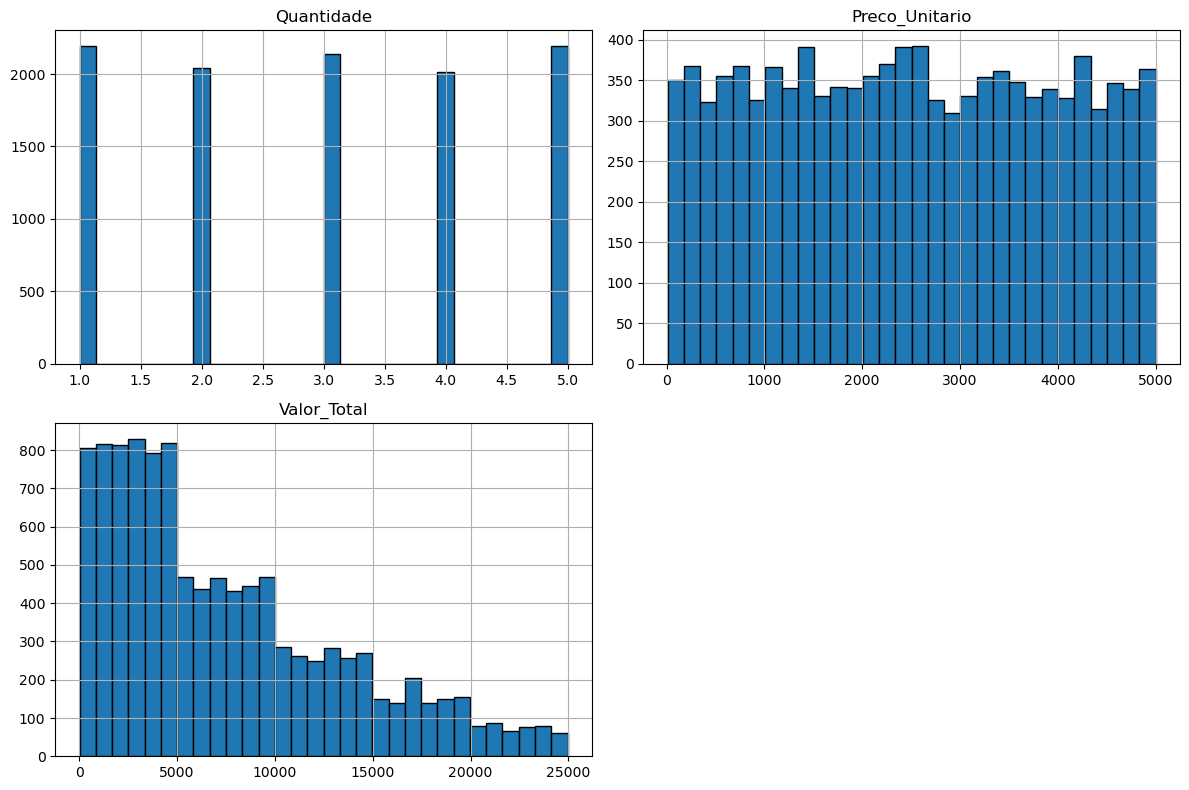

In [10]:
# Distribuição das variáveis numéricas
df_num = df.select_dtypes(include="number")
df_num.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

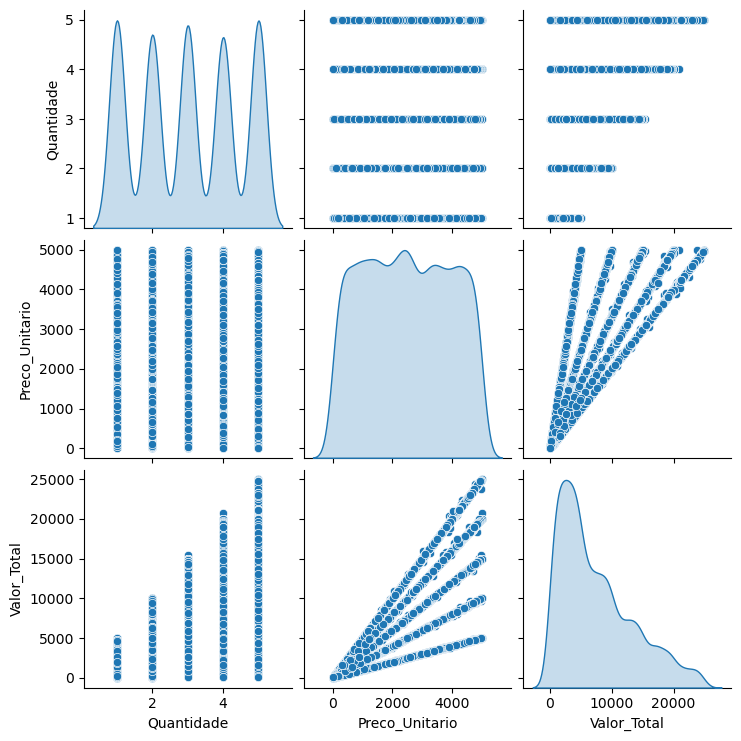

In [11]:
# Gerando gráficos para entender a relação entre todas variáveis numéricas
# O parametro diag_kind=kde faz com que na linha diagonal seja mostrada a distribuição das variaveis
sns.pairplot(df_num, diag_kind='kde')
plt.show()


## Entendendo colunas categóricas

In [12]:
# Selecionando somente colunas não-numéricas
df_cat = df.select_dtypes(exclude="number")
# ou df_cat = df.select_dtypes(include="object")
df_cat.head()

,ID_Pedido,Data_Venda,Nome_Produto,Categoria,Nome_Cliente,Estado,Email,Metodo_Pagamento
0,01a193ef-60a9-4aa6-8d51-50c61589cc0a,2022-08-10,Camiseta Básica,Roupas,Patrícia Ferreira,PA,patrícia.ferreira@teste.br,PIX
1,4ae8427f-14ed-4bff-9bbf-5e6f53e9085e,2024-09-13,Bicicleta Mountain Bike,Esportes e Lazer,Bruno Santos,AM,bruno.santos@web.org,PIX
2,9a734f36-017e-4af7-af06-60f8e7f727b9,2022-09-24,Poemas ao Luar,Livros,Ana Almeida,MA,NaN,Boleto Bancário
3,05a2909d-c14e-4262-9a24-c0b02330a275,2022-07-24,Cozinha para Iniciantes,Livros,Patrícia Mendes,SE,patrícia.mendes@email.com,PayPal
4,d09281ba-b013-4f1c-888a-71987c865733,2024-03-06,Vestido Floral,Roupas,Carlos Mendes,RS,carlos.mendes@teste.br,PIX


In [13]:
# Conferindo se todas colunas que pegamos estão certas em seus tipos
df_cat.dtypes

ID_Pedido                   object
Data_Venda          datetime64[ns]
Nome_Produto                object
Categoria                   object
Nome_Cliente                object
Estado                      object
Email                       object
Metodo_Pagamento            object
dtype: object

In [14]:
for col in df_cat.columns:
    print(f'\n--- {col} ---')
    counts = df_cat[col].value_counts(dropna=False)
    percent = df_cat[col].value_counts(dropna=False,normalize=True) * 100
    freq_table = pd.DataFrame({'Frequência': counts, 'Porcentagem (%)': percent.round(2)})
    print(freq_table)




--- ID_Pedido ---
                                      Frequência  Porcentagem (%)
ID_Pedido                                                        
2f053d78-e420-4fd7-b7e0-0e31f3e4e290           2             0.02
0bf1c4c5-158b-444a-9fb9-8c25bf4d6235           2             0.02
76b87283-fdbf-4d2b-af47-89c17d48560d           2             0.02
73849f6d-e437-4386-a62d-46fb224c01cb           2             0.02
f3076cdf-0c6d-4bea-84bb-a13b76032c48           2             0.02
...                                          ...              ...
14572e1d-e280-414a-8ddb-ddba214e61aa           1             0.01
f4c3096b-eb21-441e-ab4d-e1c7c9072329           1             0.01
e6aac560-25fb-4a46-a882-030d0ba8c6ab           1             0.01
f220de3f-d4ba-4982-bc1d-a6b3ac4d6650           1             0.01
a0b86f77-b740-4fef-9177-454202603309           1             0.01

[10500 rows x 2 columns]

--- Data_Venda ---
            Frequência  Porcentagem (%)
Data_Venda                           

Vamos registrar o que vimos até aqui nas categóricas:
- IDs de Pedidos duplicados
- Categorias duplicadas com diferentes ortografias
- Estados NaN
- Emails NaN
- Pagamentos NaN

# Tratamento dos valores nulos e outliers

Já sabemos que as colunas que possuem valores nulos são
1. Preço Unitario
2. Estado
3. Email
4. Método de Pagamento

- A coluna categoria está com valores duplicados
- Valor_Total não corresponde a preço unitário x quantidade

In [15]:
df.columns

Index(['ID_Pedido', 'Data_Venda', 'Nome_Produto', 'Categoria', 'Quantidade',
       'Preco_Unitario', 'Valor_Total', 'Nome_Cliente', 'Estado', 'Email',
       'Metodo_Pagamento'],
      dtype='object')

In [16]:
# Analisando pedidos duplicados
df[df.duplicated(["ID_Pedido"], keep=False)].sort_values(by="ID_Pedido")

# Vimos que as duplicatas são de fato iguais então podemos dropar
df.drop_duplicates(subset="ID_Pedido", inplace=True)

# Verificando se foram dropadas
df[df.duplicated(["ID_Pedido"], keep=False)].sort_values(by="ID_Pedido")

,ID_Pedido,Data_Venda,Nome_Produto,Categoria,Quantidade,Preco_Unitario,Valor_Total,Nome_Cliente,Estado,Email,Metodo_Pagamento


In [17]:
# Preenchendo os valores ausentes de preço unitario com o valor total dividido pela quantidade
df["Preco_Unitario"] = df["Preco_Unitario"].fillna(df["Valor_Total"] / df["Quantidade"])
df["Valor_Total"] = (df["Preco_Unitario"] * df["Quantidade"]).round(2)
df["Preco_Unitario"].isnull().sum()

0

In [18]:
# Resolvendo os Na's de Estado
df["Estado"] = df["Estado"].fillna("Desconhecido")
df["Estado"].isnull().sum()

0

In [19]:
# Resolvendo Na's de Email
df["Email"] = df["Email"].fillna("Desconhecido")
df["Email"].isnull().sum()

0

In [20]:
# Resolvendo Na's de Método de Pagamento
df["Metodo_Pagamento"] = df["Metodo_Pagamento"].fillna("Desconhecido")
df["Metodo_Pagamento"].isnull().sum()

0

In [21]:
df.isnull().sum()

ID_Pedido           0
Data_Venda          0
Nome_Produto        0
Categoria           0
Quantidade          0
Preco_Unitario      0
Valor_Total         0
Nome_Cliente        0
Estado              0
Email               0
Metodo_Pagamento    0
dtype: int64

In [22]:
# Resolvendo categorias com vários nomes iguais
df['Categoria'] = df['Categoria'].apply(lambda x: x.strip().capitalize())

In [23]:
df['Categoria'].value_counts()

Categoria
Livros              2166
Esportes e lazer    2123
Eletrônicos         2079
Roupas              2076
Casa e cozinha      2056
Name: count, dtype: int64

### Tratando os outliers

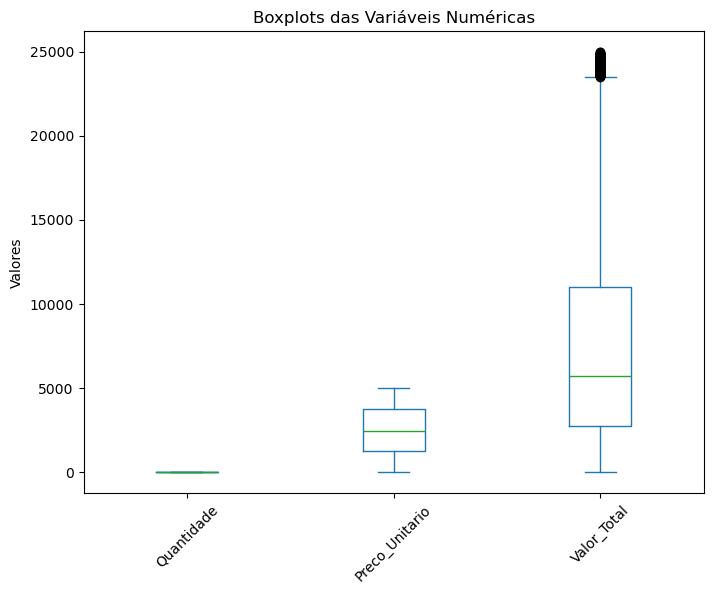

In [24]:
df.plot.box(figsize=(8, 6))
plt.title("Boxplots das Variáveis Numéricas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Cálculo do IQR
Q1 = df['Valor_Total'].quantile(0.25)
Q3 = df['Valor_Total'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
outliers = df[(df['Valor_Total'] < limite_inferior) | (df['Valor_Total'] > limite_superior)]

Nesse caso em específico nossos outliers são simplesmente vendas que acabam pegando muitos produtos de preço unitário elevado, não apresentam nenhum erro em questão, logo não serão removidos.

# Conversão de tipos e otimização de memória

In [26]:
df.dtypes

ID_Pedido                   object
Data_Venda          datetime64[ns]
Nome_Produto                object
Categoria                   object
Quantidade                   int64
Preco_Unitario             float64
Valor_Total                float64
Nome_Cliente                object
Estado                      object
Email                       object
Metodo_Pagamento            object
dtype: object

In [27]:
mem_antiga = df.memory_usage(deep=True)
mem_antiga

Index                84000
ID_Pedido           892500
Data_Venda           84000
Nome_Produto        740594
Categoria           658837
Quantidade           84000
Preco_Unitario       84000
Valor_Total          84000
Nome_Cliente        688407
Estado              538650
Email               781936
Metodo_Pagamento    747467
dtype: int64

In [28]:
df.agg(["nunique","min","max"]).T

,nunique,min,max
ID_Pedido,10500,000301a7-2563-4de8-ad0f-185137a84075,fffebd39-9258-47c4-95d5-5b1978981327
Data_Venda,1096,2022-01-01 00:00:00,2024-12-31 00:00:00
Nome_Produto,25,Aventuras em Marte,Vestido Floral
Categoria,5,Casa e cozinha,Roupas
Quantidade,5,1,5
Preco_Unitario,10411.0,10.61,5000.22
Valor_Total,10455.0,11.03,24961.6
Nome_Cliente,400,Ana Almeida,Valentina Souza
Estado,28,AC,TO
Email,1990,Desconhecido,valentina.souza@web.org


Então podemos realizar as seguintes conversões seguindo a tabela acima:
- ID_Pedido -> Será dropado, já que cada pedido é único
- Data_Venda -> Já está como datetime
- Nome_Produto -> Vira category
- Categoria -> Vira category
- Quantidade -> Vira uint8
- Preco_Unitario -> Vira uint16
- Valor_Total -> Vira uint16
- Nome_Clinte -> Vira str
- Estado -> Vira category
- Email -> Vira str
- Método_Pagamento -> Vira category

In [29]:
df = df.astype({
    "ID_Pedido": "string",
    "Nome_Produto": "category",
    "Categoria": "category",
    "Quantidade": "uint8",
    "Preco_Unitario": "float32",
    "Valor_Total": "float32",
    "Nome_Cliente": "string",
    "Estado": "category",
    "Email": "string",
    "Metodo_Pagamento": "category"
})

### Tabela de comparação consumo de memória Antigo x Pós-Conversão

In [30]:
mem_nova = df.memory_usage(deep=True)
mem_usage = pd.concat([mem_antiga, mem_nova], axis=1)
mem_usage.columns = ['antiga', 'nova']
mem_usage["otimização (%)"] = (100 * (mem_usage["antiga"] - mem_usage["nova"]) / mem_usage["antiga"])
total_antiga = mem_usage['antiga'].sum()
total_nova = mem_usage['nova'].sum()
mem_usage.loc['TOTAL'] = [total_antiga, total_nova, 100 * (total_antiga - total_nova) / total_antiga]
mem_usage.round(2)

,antiga,nova,otimização (%)
Index,84000.0,84000.0,0.00
ID_Pedido,892500.0,892500.0,0.00
Data_Venda,84000.0,84000.0,0.00
Nome_Produto,740594.0,12917.0,98.26
Categoria,658837.0,10999.0,98.33
Quantidade,84000.0,10500.0,87.50
Preco_Unitario,84000.0,42000.0,50.00
Valor_Total,84000.0,42000.0,50.00
Nome_Cliente,688407.0,721162.0,-4.76
Estado,538650.0,13010.0,97.58


# Carregando os dados

In [31]:
df["Ano_Venda"] = df["Data_Venda"].dt.year
df["Mes_Venda"] = df["Data_Venda"].dt.month

# Reorganizando colunas
df = df[["ID_Pedido",
         "Nome_Produto", 
         "Categoria", 
         "Nome_Cliente",
         "Email",
         "Estado",
         "Data_Venda",
         "Mes_Venda",
         "Ano_Venda", 
         "Quantidade", 
         "Preco_Unitario", 
         "Metodo_Pagamento",
         "Valor_Total"]]

In [32]:
df.to_parquet("dataset_tratado.parquet", index=False, engine="pyarrow")